In [1]:
import pandas as pd

In [ ]:
df_train = pd.read_csv("fraudTrain.csv")

In [3]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df_train.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)

In [ ]:
print(df_train.shape)

(1296675, 12)
(555719, 12)


In [8]:
df_train.isnull().sum().any()

False

In [9]:
df_train.nunique()

merchant          693
category           14
amt             52928
gender              2
lat               968
long              969
city_pop          879
job               494
unix_time     1274823
merch_lat     1247805
merch_long    1275745
is_fraud            2
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   job         1296675 non-null  object 
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 118.7+ MB


In [11]:
df_train.duplicated().any()

False

In [12]:
cat_variable = df_train[['merchant','category','gender','job']]
numeric_list = ['amt','lat','long','city_pop','unix_time','merch_lat','merch_long']

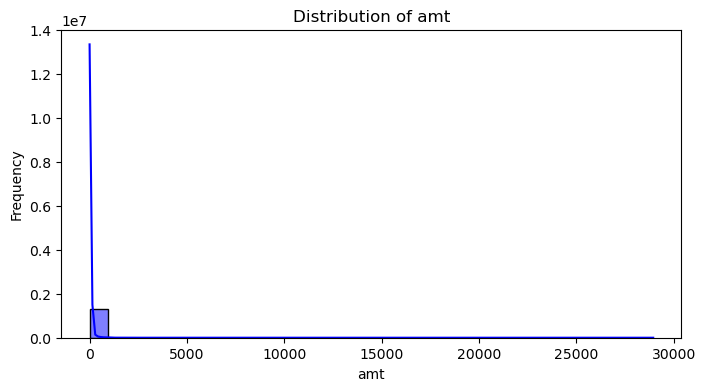

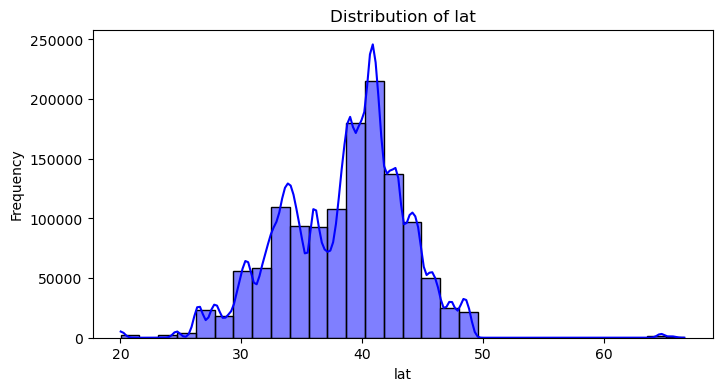

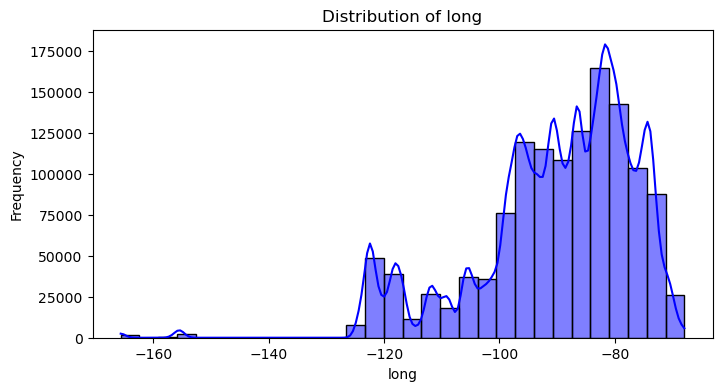

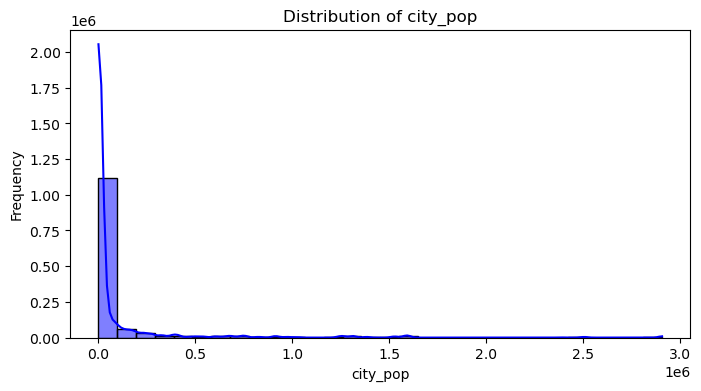

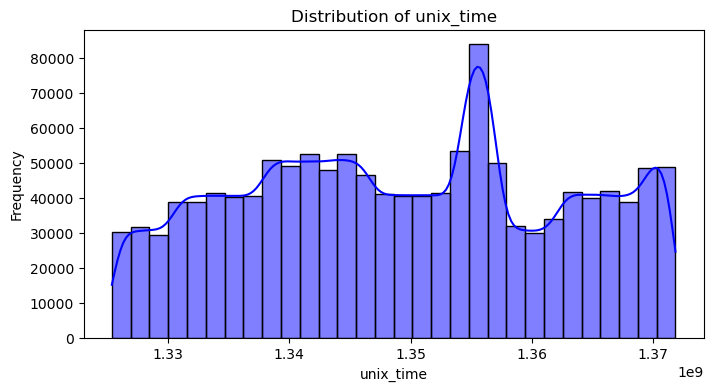

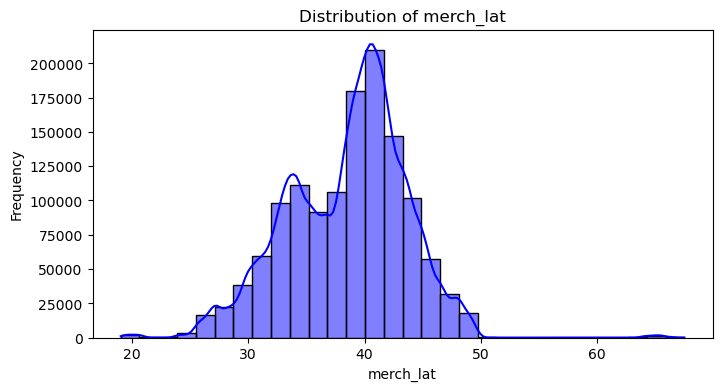

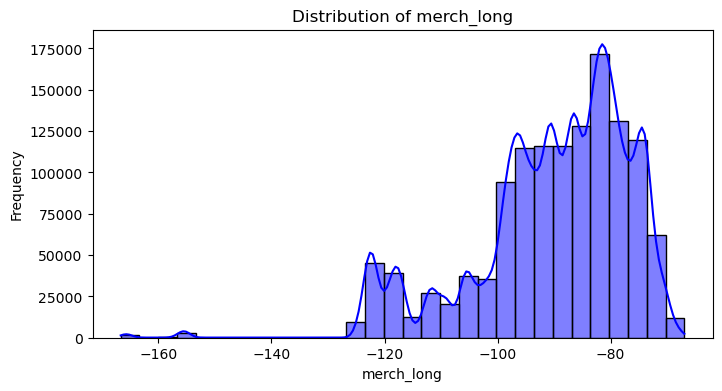

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in numeric_list:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

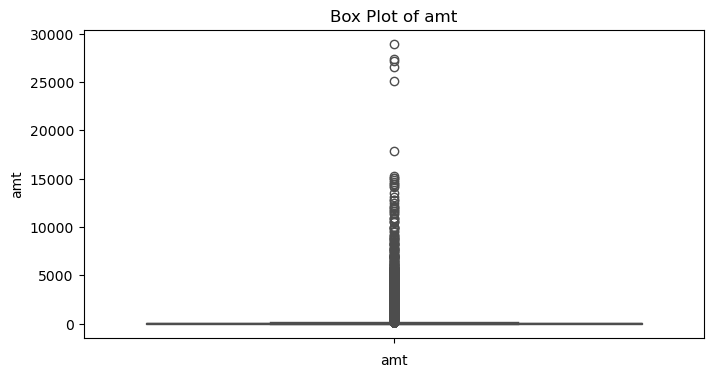

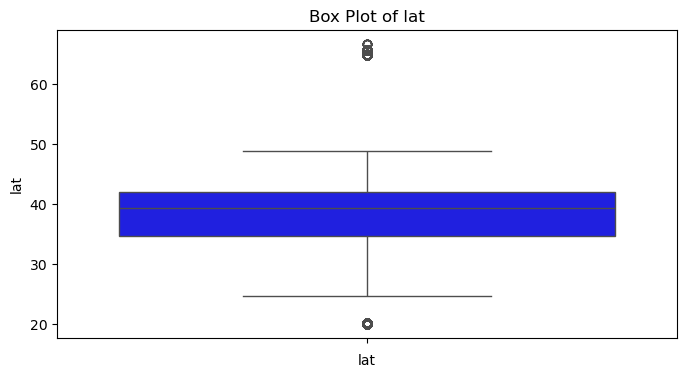

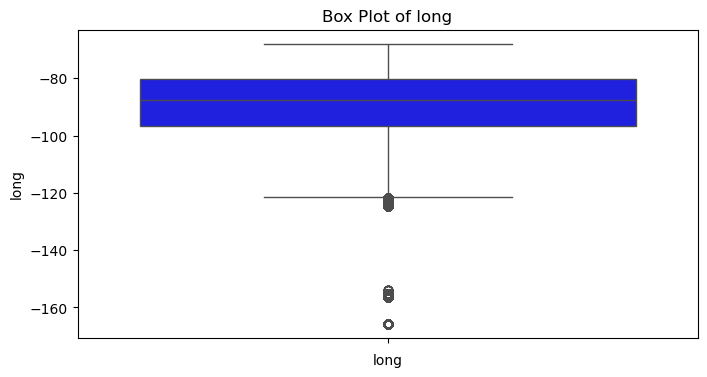

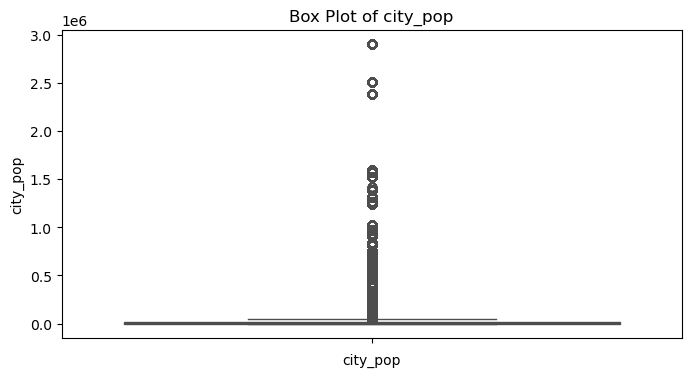

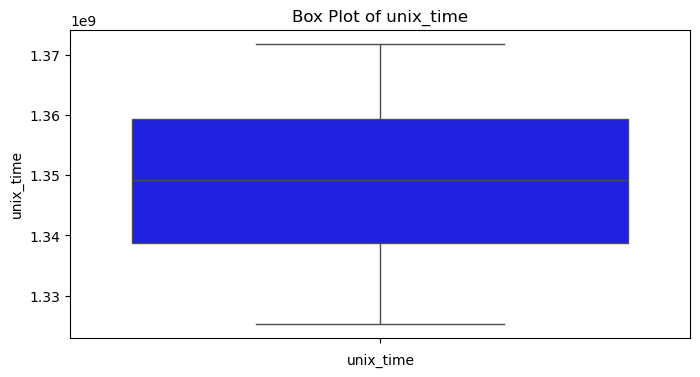

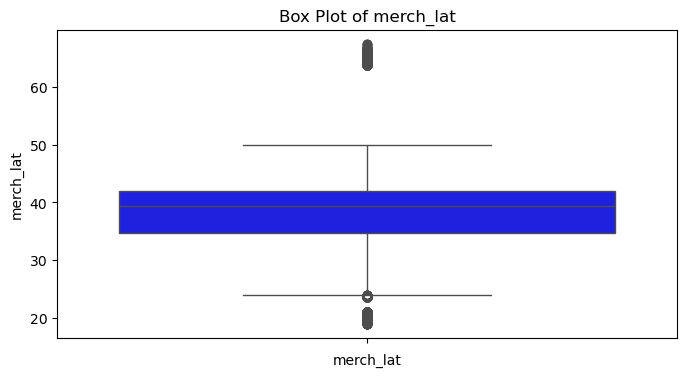

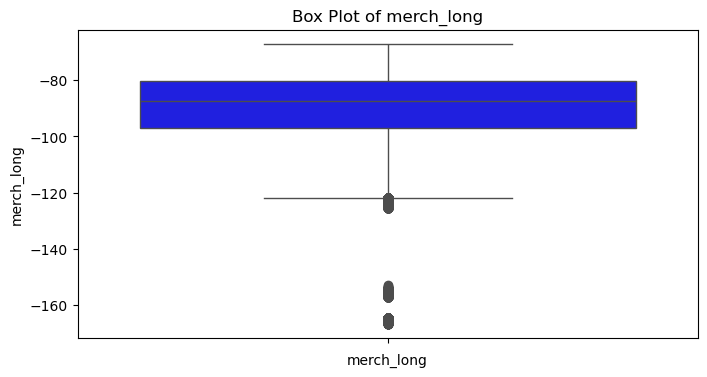

In [14]:
for column in numeric_list:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df_train[column], color='blue')
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

([<matplotlib.axis.XTick at 0x1e52a213650>,
 [Text(0, 0, 'Non-Fraud Transaction'), Text(1, 0, 'Fraud Transaction')])

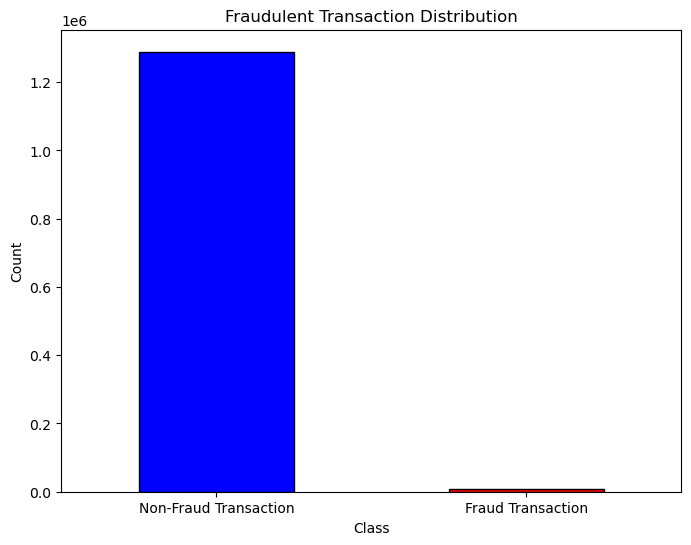

In [15]:
plt.figure(figsize=(8,6))
df_train['is_fraud'].value_counts().plot(kind='bar',color=['blue','red'],edgecolor='black')
plt.title("Fraudulent Transaction Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['Non-Fraud Transaction', 'Fraud Transaction'], rotation=0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in cat_variable.columns:
    df_train[column] = encoder.fit_transform(df_train[column])


In [ ]:
#Standarizing features - Time and Amount Variable 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_scaled = df_train.copy()
df_train_scaled[numeric_list] = scaler.fit_transform(df_train[numeric_list])

In [18]:
df_train_scaled['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [19]:
fraud = df_train_scaled[df_train_scaled['is_fraud'] == 1]
non_fraud = df_train_scaled[df_train_scaled['is_fraud'] == 0]
non_fraud_sample = non_fraud.sample(len(fraud), random_state=42)
balanced_df = pd.concat([fraud, non_fraud_sample])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,329,4,1.512382,1,0.855525,-1.966315,-0.292040,139,1.620154,0.807524,-1.996525,1
1,65,8,5.235903,1,-1.632572,-0.165263,-0.289987,52,-0.139352,-1.548510,-0.093653,1
2,34,1,-0.391483,1,1.831547,0.012990,-0.293262,202,0.016610,1.867049,0.043650,0
3,315,1,-0.417557,1,1.245689,0.320700,-0.283910,423,-0.186242,1.358403,0.296825,0
4,199,10,-0.329543,0,-2.180407,0.635154,-0.125811,178,-1.710902,-2.123489,0.663127,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15007,677,9,-0.118148,0,0.531143,1.089277,-0.293819,195,0.597023,0.384527,1.119121,1
15008,316,4,0.071976,1,-2.041335,0.600857,0.491653,343,-1.838261,-2.042695,0.668096,0
15009,447,4,1.791892,0,0.330623,0.455586,-0.293723,363,0.705733,0.407639,0.432208,1
15010,415,4,1.462106,1,0.697205,0.181824,-0.204680,476,-1.508140,0.819044,0.135363,1


In [20]:
balanced_df['is_fraud'].value_counts()

is_fraud
1    7506
0    7506
Name: count, dtype: int64

is_fraud
1    7506
0    7506
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x1e532a5c290>,
 [Text(0, 0, 'Non-Fraud Transaction'), Text(1, 0, 'Fraud Transaction')])

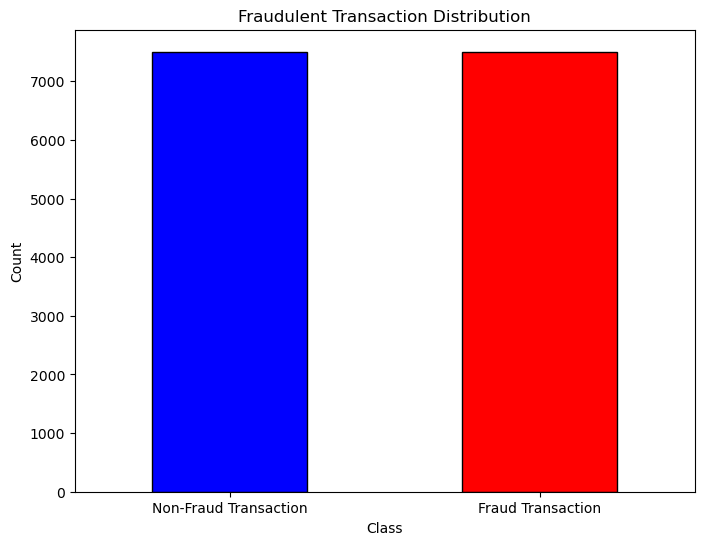

In [21]:
import matplotlib.pyplot as plt
print(balanced_df['is_fraud'].value_counts())
plt.figure(figsize=(8,6))
balanced_df['is_fraud'].value_counts().plot(kind='bar',color=['blue','red'],edgecolor='black')
plt.title("Fraudulent Transaction Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['Non-Fraud Transaction', 'Fraud Transaction'], rotation=0)

In [22]:
X = balanced_df.iloc[:,:-1]
y = balanced_df['is_fraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12009, 11), (12009,), (3003, 11), (3003,))

In [23]:
from sklearn.linear_model import LogisticRegression

# Initializing the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train,y_train)

c:\Users\togas\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [24]:
# Evaluate the model's performance on the train data
logistic_pred_train = logistic_model.predict(X_train)

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# Evaluation on train data 
print(f"Accuracy for Logistic Regression: {accuracy_score(y_train, logistic_pred_train):.3f}")
print(f"Classification Report for Logistic Regression:\n{classification_report(y_train, logistic_pred_train)}\n")

Accuracy for Logistic Regression: 0.857
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      5998
           1       0.93      0.77      0.84      6011

    accuracy                           0.86     12009
   macro avg       0.87      0.86      0.86     12009
weighted avg       0.87      0.86      0.86     12009




In [25]:
# Evaluation on test data 
logistic_pred_test = logistic_model.predict(X_test)
print(f"Accuracy for Logistic Regression: {accuracy_score(y_test, logistic_pred_test):.3f}")
print(f"Classification Report for Logistic Regression:\n{classification_report(y_test, logistic_pred_test)}\n")
print(f"ROC-AUC score: {roc_auc_score(y_test, logistic_pred_test):.3f}\n")

Accuracy for Logistic Regression: 0.853
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1508
           1       0.94      0.76      0.84      1495

    accuracy                           0.85      3003
   macro avg       0.87      0.85      0.85      3003
weighted avg       0.87      0.85      0.85      3003


ROC-AUC score: 0.853



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [27]:
# Initialize models
RF = RandomForestClassifier(random_state=42)
KNN = KNeighborsClassifier()
SVM = SVC(random_state=42)
DT = DecisionTreeClassifier(random_state=42)
XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [28]:
models = {
    "Random Forest": RF,
    "KNN": KNN,
    "SVM":SVM,
    "Decision Tree": DT,
    "XGBoost": XGB
}

# Train the model and evaluating on the train data
for name, model in models.items():
    print("-------------------------------------------------------------")
    model.fit(X_train,y_train)

    # Predictions on Trained data
    y_pred_train = model.predict(X_train)

    # Evaluation
    print(f"Accuracy for {name}: {accuracy_score(y_train, y_pred_train):.3f}")
    print(f"Classification Report for {name}:\n{classification_report(y_train, y_pred_train)}\n")

-------------------------------------------------------------
Accuracy for Random Forest: 1.000
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5998
           1       1.00      1.00      1.00      6011

    accuracy                           1.00     12009
   macro avg       1.00      1.00      1.00     12009
weighted avg       1.00      1.00      1.00     12009


-------------------------------------------------------------
Accuracy for KNN: 0.749
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      5998
           1       0.76      0.72      0.74      6011

    accuracy                           0.75     12009
   macro avg       0.75      0.75      0.75     12009
weighted avg       0.75      0.75      0.75     12009


-------------------------------------------------------------
Accuracy for SVM: 0.614
Clas

c:\Users\togas\anaconda3\envs\ML\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:30:42] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
 # Evaluating Test Data 
for name, model in models.items():
    print("-------------------------------------------------------------")
    print(f"Evaluation on {name}: ")

    y_pred_test = model.predict(X_test)

    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred_test):.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred_test)}\n")
    print(f"ROC-AUC score: {roc_auc_score(y_test, y_pred_test):.3f}\n")

-------------------------------------------------------------
Evaluation on Random Forest: 
Accuracy for Random Forest: 0.9547
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1508
           1       0.96      0.95      0.95      1495

    accuracy                           0.95      3003
   macro avg       0.95      0.95      0.95      3003
weighted avg       0.95      0.95      0.95      3003


ROC-AUC score: 0.955

-------------------------------------------------------------
Evaluation on KNN: 
Accuracy for KNN: 0.5874
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1508
           1       0.59      0.55      0.57      1495

    accuracy                           0.59      3003
   macro avg       0.59      0.59      0.59      3003
weighted avg       0.59      0.59      0.59      3003


ROC-AUC score: 0